# Analiza rabljenih avtomobilov s strani avto.net

Analizo bomo opravili s pomočjo knjižnice pandas in csv tabele, ki jo pred začetkom naložimo.

In [4]:
# naložimo paket
import pandas as pd

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.options.display.max_rows = 10

# izberemo interaktivni "notebook" stil risanja
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
import os.path
pot_do_podatkov = os.path.join("../../", "avtomobili", "Avtomobili", "obdelani-podatki", "oglasi.csv")

avti = pd.read_csv(pot_do_podatkov)

Poglejmo si podatke.
Opomba: velikost motorja je podana v ccm, moč motorja v kW, cena pa v evrih.

In [10]:
avti.sort_values("znamka")

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena,petletje
0,Abarth - 500-PANORAMA-ODLIÈEN,Abarth,2008,119000,bencinski motor,ročni menjalnik,1369,99,9650,2010.0
10,Alfa Romeo Giulia 2.2 Multijet-1.LASTNIK-ALU-P...,Alfa,2016,147700,diesel motor,avtomatski menjalnik,2143,110,17990,2015.0
9,Alfa Romeo GT 1.9 JTD M-Jet Progression,Alfa,2005,300000,diesel motor,ročni menjalnik,1910,110,1499,2005.0
8,Alfa Romeo 159 Sportwagon 1.9 JTDM Progression...,Alfa,2008,250000,diesel motor,avtomatski menjalnik,1910,110,1600,2010.0
7,Alfa Romeo 159 2.0 JTDM-BI-XENON-NAVI-170PS-V ...,Alfa,2012,154000,diesel motor,ročni menjalnik,1956,125,7999,2010.0
...,...,...,...,...,...,...,...,...,...,...
923,Volvo S60 D2 NAVI+PDC,Volvo,2013,162000,diesel motor,ročni menjalnik,1560,84,7890,2015.0
922,Volvo S40,Volvo,2011,184150,diesel motor,avtomatski menjalnik,1984,130,5600,2010.0
933,Volvo XC90 D5 AWD Kinetic Geartronic,Volvo,2017,82457,diesel motor,avtomatski menjalnik,1969,173,30900,2015.0
927,Volvo V60 Cross Country D3 Summum-Usnje-Kamera,Volvo,2016,131214,diesel motor,ročni menjalnik,1969,110,15440,2015.0


Iz vsakega oglasa smo za dan avtomobil izločili sledeče:
- polno ime
- znamko
- leto prve registracije
- stevilo prevozenih kilometrov
- vrsto motorja
- vrsto menjalnika
- velikost motorja
- moč motorja
- ceno

## 1. Avto za študenta

Denimo da ima študent privarčevanih 1000€ in ga zanima ali si z njimi lahko privošči nakup avtomobila. Ali lahko na spletni strani avto.net najde kaj primernega? 

In [12]:
studentski_avti = avti[(avti.cena < 1000)]
studentski_avti[["ime_avtomobila", "cena"]].sort_values(["cena"], ascending=[True])

,ime_avtomobila,cena
831,Volkswagen Hroè VW HOT ROD,81
715,Seat Ibiza,180
320,Fiat Multipla 1.9 JTD ELX 115,200
556,Opel Corsa Cosmo 1.4 16V Easytronic,300
343,Ford Fiesta Flair 1.3,300
...,...,...
243,Chevrolet Aveo 1.2 Direct,950
744,Toyota Avensis W G 2.0 D-4D,990
441,Mercedes-Benz C-Razred,990
672,Renault Megane 1.5 dCi,990


In [5]:
studentski_avti.shape[0]

78

Študent torej ima nekaj izbire, natančneje 78 avtov za izbran znesek pod 1000€. Študent se bržkone želi prepričati, da so oglasi poštene narave in so tako starejši avtomobili ugodnejši od novejših.

<AxesSubplot:xlabel='leto_prve_registracije'>

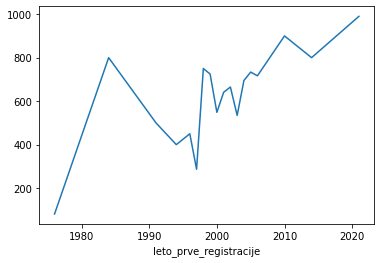

In [13]:
studentski_avti.groupby("leto_prve_registracije").mean()["cena"].plot()

In [18]:
studentski_avti[(studentski_avti.leto_prve_registracije > 1981) & (studentski_avti.leto_prve_registracije < 1990)][["ime_avtomobila", "leto_prve_registracije", "cena"]]

,ime_avtomobila,leto_prve_registracije,cena
808,Volkswagen Golf GL D,1984,800


Večji odmik se pojavi samo pri avtih iz osemdesetih. Ob dodatnem vpogledu lahko vidimo, da je le en primer avtomobila iz tega časovnega obdobja, zato iz tega ne moremo sklepati, da bi bili morda avtomobili iz tega časa več vredni. V povprečju torej velja predpostvaka o korelaciji med starostjo in ceno avtomobilov. 

Študent si gotovo želi največ več avta za svoj denar. Denimo, da je rojen leta 2000 in si ne želi avtomobila starejšega od sebe. V želji po boljši ohranjenosti pa si ogleduje le avtomobile z manj kot 200 000 prevoženimi kilometri.

In [45]:
boljsa_studentska_izbira = studentski_avti[(studentski_avti.leto_prve_registracije > 2000) & (studentski_avti.prevozeni_kilometri < 200000)]
boljsa_studentska_izbira.sort_values(["cena", "leto_prve_registracije"], ascending=[True, True])

,ime_avtomobila,znamka,leto_prve_registracije,prevozeni_kilometri,vrsta_motorja,vrsta_menjalnika,velikost_motorja,moc_motorja,cena
556,Opel Corsa Cosmo 1.4 16V Easytronic,Opel,2006,105000,bencinski motor,ročni menjalnik,1364,66,300
577,Peugeot 106 XN Pack,Peugeot,2001,110000,bencinski motor,ročni menjalnik,1124,44,505
303,Citroen Xsara 2.0 HDi Exclusive,Citroen,2003,195600,diesel motor,ročni menjalnik,1997,66,530
552,Opel Corsa Comfort 1.2 16V Easytronic prvilast...,Opel,2002,128000,bencinski motor,ročni menjalnik,1199,55,550
553,Opel Corsa Comfort 1.2 16V prvi lastnik samo12...,Opel,2002,128000,bencinski motor,ročni menjalnik,1199,55,550
...,...,...,...,...,...,...,...,...,...
822,Volkswagen Golf Variant 2.0 TDI BMT Highline D...,Volkswagen,2014,175532,diesel motor,avtomatski menjalnik,1968,110,800
759,Toyota Yaris 1.3 VVT-i Sol,Toyota,2003,184000,bencinski motor,ročni menjalnik,1298,64,850
324,Fiat Punto 1.2 16V Dynamic,Fiat,2004,183000,bencinski motor,ročni menjalnik,1242,59,850
545,Opel Corsa,Opel,2006,190000,bencinski motor,ročni menjalnik,1229,59,900


<AxesSubplot:xlabel='znamka'>

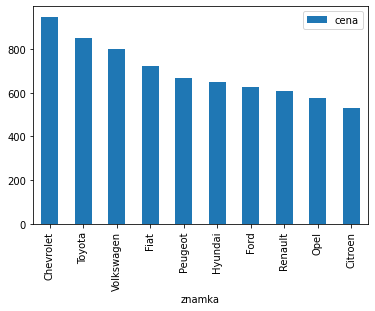

In [103]:
boljsa_studentska_izbira.groupby("znamka").mean().sort_values("cena", ascending=[False]).plot.bar(y="cena")

In [80]:
boljsa_studentska_izbira.znamka.nunique()

10

Ob teh pogojih ima študent na voljo osemnajst avtomobilov desetih znamk. Pri tem se bo finančno rezerviran študent odločil za Citroena, Chevrolet pa bo izbira tistega, ki ima nekoliko več denarja. 

Poglejmo si še kakšen je povprečen avto, ki ga lahko pričakuje kupec za manj kot 1000€.
TODO

## 2. Primerjava bencin/dizel

Ob nakupu avtomobila se lahko izbere različne vrste motorja. Včasih je bil v uporabi predvsem bencinski motor, v zadnjih desetletjih pa se mu je na vrhu lestvice popularnosti pridružil dizelski motor. Na trgu so tudi druge različice, kot na primer avtomobili na električni pogon in pa hibridna vozila, a so le te vsaj zankrat v manjšini.

<AxesSubplot:xlabel='vrsta_motorja'>

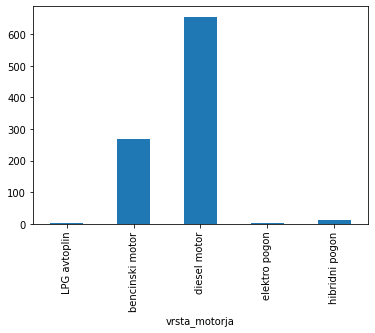

In [9]:
avtomobili_motor = avti.groupby("vrsta_motorja")
avtomobili_motor.size().plot.bar(x="vrsta_motorja", y=avtomobili_motor.size())

V skladu z zgoraj napisanim so tudi rabljeni avtomobili na avto.net v večini primerov opremljeni bodisi z bencinskim bodisi z dizlovim motorjem, ki ga ima največ avtomobilov. Posledično je smiselno ti dve vrsti motorja primerjati in se vprašati, kateri motor je za kupca boljša izbira.
Dizelski motor je v primerjavi z bencinskim smatran za primernejšega za daljše razdalje, veliko prevoženih kilometrov in običajno velja za nekoliko dražjega. Dolgi kilometri na cesti naj bi se bolj izplačali z dizlovim motorjem, saj je za dizel ponavadi potrebno odšteti precej manj kot za bencin. Potrebno pa je omeniti, da je v času posledic ki jih je Covid-19 pustil na svetovnom gospodarstvu, ta razlika v ceni zanemarljiva oziroma je bencin še cenejši (1,074€ / 1,124€ - iz dne 2.2.2021, vir: [AMZS](https://www.amzs.si/na-poti/cene-goriv-po-evropi)).
Primerjajmo torej rabljene avtomobile z dizlovim in bencinskim motorjem, ki jih je moč kupiti na [avto.net](https://www.avto.net/Ads/results.asp?znamka=&model=&modelID=&tip=&znamka2=&model2=&tip2=&znamka3=&model3=&tip3=&cenaMin=0&cenaMax=999999&letnikMin=0&letnikMax=2090&bencin=0&starost2=999&oblika=&ccmMin=0&ccmMax=99999&mocMin=&mocMax=&kmMin=0&kmMax=9999999&kwMin=0&kwMax=999&motortakt=&motorvalji=&lokacija=0&sirina=&dolzina=&dolzinaMIN=&dolzinaMAX=&nosilnostMIN=&nosilnostMAX=&lezisc=&presek=&premer=&col=&vijakov=&EToznaka=&vozilo=&airbag=&barva=&barvaint=&EQ1=1000000000&EQ2=1000000000&EQ3=1000000000&EQ4=100000000&EQ5=1000000000&EQ6=1000000000&EQ7=1000100020&EQ8=1010000001&EQ9=100000000&KAT=1010000000&PIA=&PIAzero=&PSLO=&akcija=&paketgarancije=0&broker=&prikazkategorije=&kategorija=&ONLvid=&ONLnak=&zaloga=10&arhiv=&presort=&tipsort=&stran=).

Za začetek si oglejmo povprečno ceno avta glede na motor.

<AxesSubplot:xlabel='vrsta_motorja'>

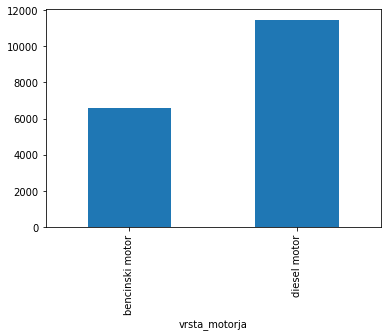

In [152]:
izbrana_motorja = avti[(avti.vrsta_motorja == "bencinski motor") | (avti.vrsta_motorja == "diesel motor")].groupby("vrsta_motorja")
izbrana_motorja.cena.mean().round().plot.bar(x = "vrsta_motorja", y = izbrana_motorja.cena)

Podajmo še primerjavo glede na povprečno prevoženo razdaljo v kilometrih.

<AxesSubplot:xlabel='vrsta_motorja'>

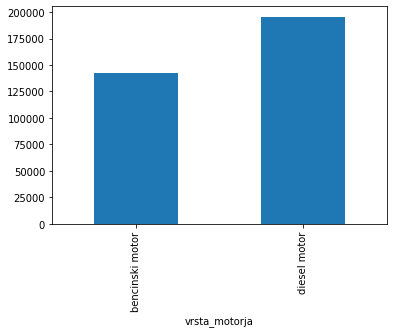

In [155]:
izbrana_motorja.prevozeni_kilometri.mean().round().plot.bar(x = "vrsta_motorja", y = izbrana_motorja.prevozeni_kilometri)

Na zadnje dodajmo še primerjavo povprečnih starosti avtomobilov (oz. leto registracije) glede na motor.

<AxesSubplot:xlabel='vrsta_motorja'>

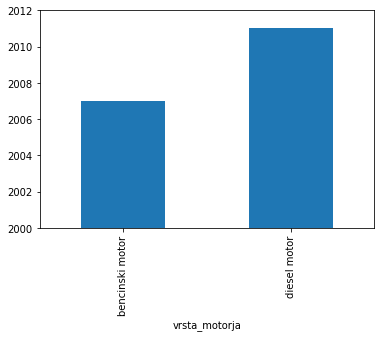

In [163]:
izbrana_motorja.leto_prve_registracije.mean().round().plot.bar(x = "vrsta_motorja", y = izbrana_motorja.leto_prve_registracije, ylim=(2000, 2012))

Kot vidimo iz grafov predpostavke o ceni in prevoženi razdalji držijo. Prav tako lahko vidimo, da so bencinski avtomobili v povprečju starejši, kar lahko pripišemo popularizaciji dizlovih motorjev v zadnjem desetletju.

Očitno opazimo, da je razlika v povprečni ceni med motorjema ogromna, skoraj dvakratna, zato je smotrno upoštevati še dodatne parametre, ki igrajo vlogo pri gibanju cen in s tem dobiti realnejšo sliko o cenovni razliki med "bencincem" in "dizlom". To so vrsta menjalnika, velikost in moč motorja, število prevoženih kilometrov in pa seveda starost avtomobila, ki jo bomo za potrebe analize enačili s pretečenim časom od prve registracije.

In [21]:
avti["petletje"] = 5 * round(avti.leto_prve_registracije / 5)

## 3. Najugodnejša znamka

Želimo ugotoviti, katera znamka novejših avtomobilov je cenovno ugodnejša, upoštevajoč število prevoženih kilometrov.

Najprej si poglejmo povprečno cenovno sliko.


<AxesSubplot:xlabel='znamka'>

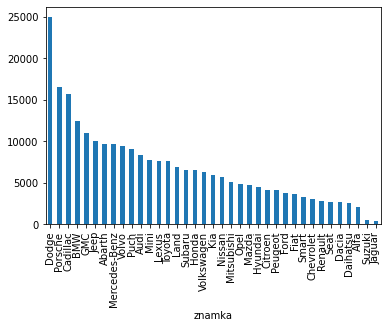

In [42]:
avti[avti.leto_prve_registracije < 2016].groupby("znamka").mean()["cena"].sort_values(ascending=[False]).plot.bar()

Pričakovano so tudi med rabljenimi avti-starimi manj kot 5 let-najdražje nekatere elitne firme, kot na primer BMW, Cadillac, Porsche in ameriški Dodge, med cenovno ugodnejšimi pa najdemo znamke kot so Jaguar, Suzuki, Dacia, Seat ipd. 

<AxesSubplot:xlabel='prevozeni_kilometri', ylabel='cena'>

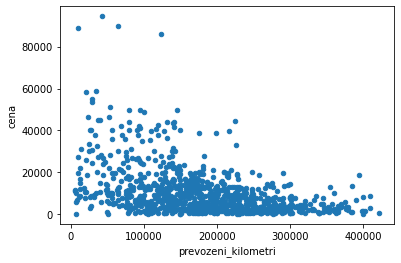

In [54]:
avti.plot.scatter("prevozeni_kilometri", "cena")

Očitno je, da prevožena razdalja vpliva na ceno avtomobila, zato jo bomo upoštevali pri primerjavi cen različnih znamk.

# 4. Napoved cene